# Heart Disease Prediction using Machine Learning

The data set is obtained from Kaggle. It has patient records with 13 parameters and last column contains wether the patient has heart disease or not.

### Importing Libraries and reading the dataset

In [1]:
import pandas as pd
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart_df = pd.read_csv('heart.csv')

In [3]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart_df.astype({'oldpeak':'int64'}).dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

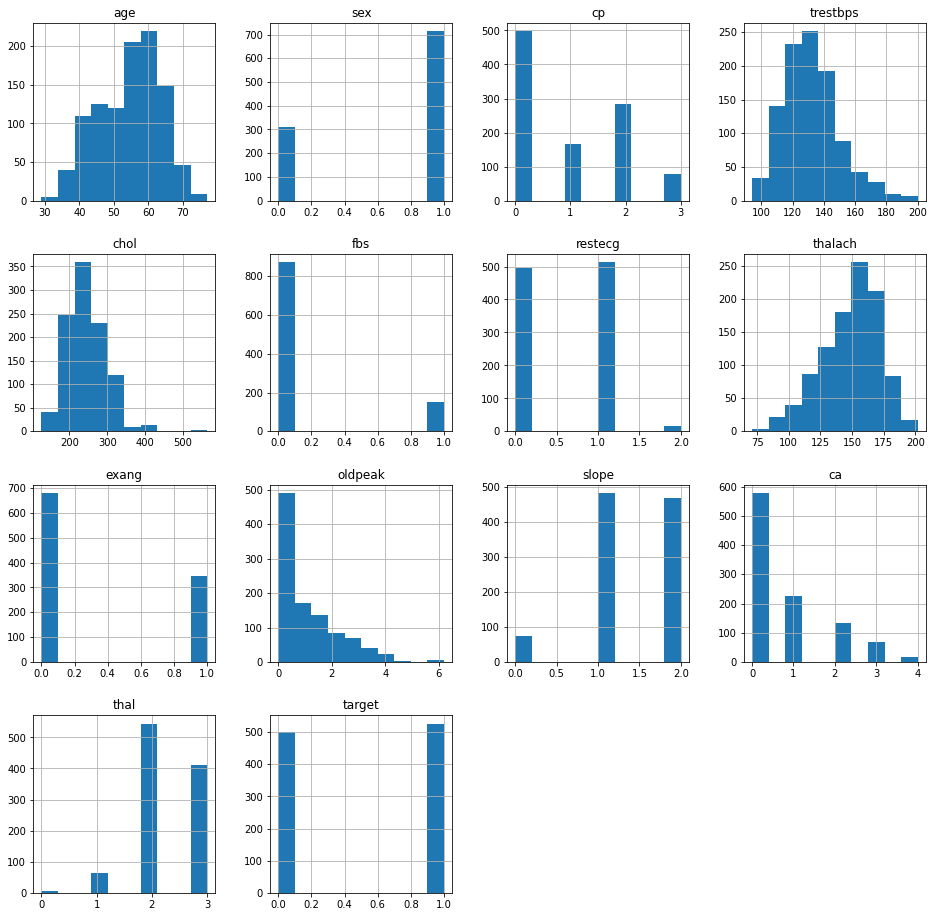

In [5]:
heart_df.hist(figsize=(16,16));

c:\Users\Suhas M\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


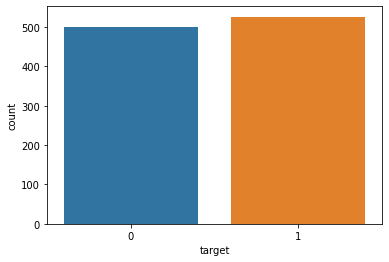

In [6]:
targ = heart_df["target"]
sns.countplot(targ);

<AxesSubplot:>

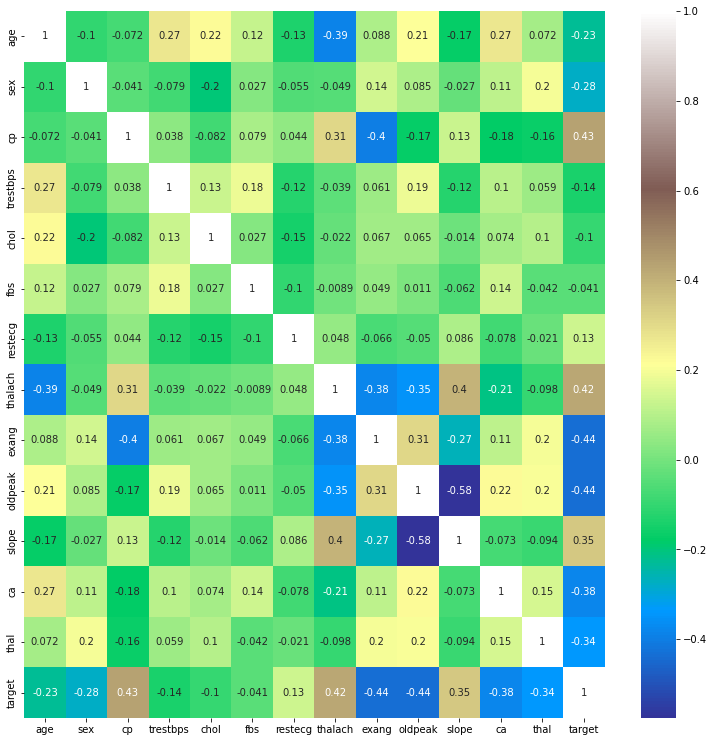

In [7]:
plt.figure(figsize=(13,13))
sns.heatmap(heart_df.corr(), annot=True, cmap='terrain')

### Dividing the dataset into train and test set

In [8]:
X = heart_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values

In [9]:
y = heart_df[['target']].values

In [10]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [11]:
y = y.flatten()
print(y)

[0 0 0 ... 0 1 0]


### KNN Model

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [13]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7121951219512195


In [14]:
pickle.dump(knn,open('heart_knn_model.sav','wb'))

In [15]:
predict_knn = knn.predict(X_test)
accuracy_knn  = metrics.accuracy_score(y_test,predict_knn)

In [16]:
predict_knn

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [17]:
accuracy_knn

0.7121951219512195

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state = 2, max_iter=1000)
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [19]:
print(lgr.score(X_test, y_test))

0.8195121951219512


In [20]:
pickle.dump(lgr,open("heart_log_regr.sav", "wb"))

### Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [22]:
print(lnr.score(X_test, y_test))

0.46354924736425507


In [23]:
pickle.dump(lnr,open("heart_lin_regr.sav", "wb"))

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
print(gnb.score(X_test, y_test))

0.8048780487804879


In [26]:
pickle.dump(gnb,open("heart_nav_bay.sav", "wb"))